# Matrix Decompositions

## Decompositions Related to Solving Linear Systems
A fundamental problem in linear algebra is solving the linear system $Ax=b$, if it is even possible. In this section, we will implement two versions of the LU algorithm and demonstrate how to use numpy to run other decomposition methods.

### LU Decomposition (Version 1)

**Pseudocode for LU_decomposition()**
1. m, n = shape(A) - *get the shape of A*
2. U = copy(A) - *create a copy of A using np.copy()*
3. L = $I_{m}$ - *initialize L with the mxm identity matrix*
4. for $j$ from $0$ to $n-1$: - iterate over the columns of A
    1. for $i$ from $j+1$ to $m-1$:
        1. $L_{i,j} \leftarrow U_{i,j}/U{j,j}$
        2. $U_{i,j:} \leftarrow U_{i,j:} - L_{i,j}U_{j,j:}$
5. Return L, U

<div class="alert alert-success">
Exercise:
Implement the first version of the LU decomposition.
</div>

In [1]:
import numpy as np

In [2]:
def LU_decomposition(A):
    m, n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    for j in range(n):
        for i in range(j+1, m):
            L[i,j] = U[i,j]/U[j,j]
            U[i,j:] = U[i,j:] - L[i,j]*U[j,j:]
    return L, U

In [3]:
A = np.random.randn(4, 3)
A

array([[-1.38853195, -0.64336879,  0.45345512],
       [-0.29532968,  0.2443905 ,  1.41820956],
       [-0.33401046,  0.83526582, -0.27032738],
       [-0.63378098, -0.35345159,  1.81766246]])

In [4]:
L, U = LU_decomposition(A)
print(L)
print()
print(U)

[[ 1.          0.          0.          0.        ]
 [ 0.21269203  1.          0.          0.        ]
 [ 0.24054935  2.59693093  1.          0.        ]
 [ 0.45643961 -0.15684129 -0.4769219   1.        ]]

[[-1.38853195e+00 -6.43368788e-01  4.53455119e-01]
 [ 0.00000000e+00  3.81229917e-01  1.32176327e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.81193364e+00]
 [ 0.00000000e+00  6.93889390e-18  0.00000000e+00]]


In [5]:
# Determine the error of our decomposition
np.sum(L.dot(U) - A)

-1.1102230246251565e-16

We see a very very small number above which means that our LU decomposition algorithm works as intended!

### Fast LU Decomposition via *Vectorization*
In our first LU Decomposition algorithm, notice that we had a loop inside a loop. One way to speed up the computation is by the use of **vectorization**. Simply put, vectorization means taking advantage of vectors to perform parallel computations instead of iterating over each entry in the vector.

In [6]:
def LU_decomposition2(A):
    m, n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    for k in range(n):
        L[k+1:,k] = U[k+1:,k]/U[k,k]
        U[k+1:,k:] = U[k+1:,k:] - np.outer(L[k+1:,k], U[k,k:].T)
    return L, U

#### Why outer product?

<img src='sketch.jpg' width=700>

In [7]:
L, U = LU_decomposition(A)
np.sum(L.dot(U) - A)

-1.1102230246251565e-16

In [8]:
L2, U2 = LU_decomposition2(A)
np.sum(L2.dot(U2) - A)

-1.1102230246251565e-16

Our second method also produces a very small error. Now, let's check if the second method is actually faster compared to the first one. In order to see the difference in efficiency, let's create a "larger" matrix using random numbers.

In [9]:
# set a randomization seed to make our results reproducible
np.random.seed(42)

In [10]:
A_ = np.random.randn(100, 100)

In [11]:
%%timeit
L, U = LU_decomposition(A_)

17.9 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit
L2, U2 = LU_decomposition2(A_)

2.79 ms ± 723 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We see that the fast LU decomposition is an order of magnitude faster than the first method.

### Scipy Matrix Decomposition and Linear System Solvers
For many established algorithms, there are packages that already implements these methods. Usually, these packages' are faster compared to our own because they use advanced tools to optimize the process. One package for solving matrix decomposition and solving linear systems is scipy.

In [13]:
from scipy import linalg

#### LU Decomposition

In [14]:
# Generate a random matrix and a random vector
A = np.random.random((10, 10))
b = np.random.random(10)

# Compute the LU decomposition of A and Pivots
lu, piv = linalg.lu_factor(A)

In [15]:
l = np.tril(lu) - np.eye(10)*np.diag(lu)
u = np.triu(lu)

In [16]:
# Find the solution x to Ax = b
x = linalg.lu_solve((lu, piv), b)
x

array([ 2.46644492, -1.78418656, -3.04404285,  1.32971972, -0.45710752,
        0.38990138,  1.21913908, -0.31258586, -0.05513679, -0.16908601])

Just to compare the speed of decomposition of the LU solver we created versus that of scipy, we time the speeds again using the matrix we used in the prior section.

In [17]:
%%timeit
linalg.lu_factor(A_)

76 µs ± 6.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


From milliseconds to microseconds!

### QR Decomposition

In [18]:
# get values for Q and R
Q, R = linalg.qr(A)

# create new variable y
y = Q.T.dot(b)

# Solve the equivalent problem to Ax = b
x = linalg.solve(R, y) # Solve Rx = y
x

array([ 2.46644492, -1.78418656, -3.04404285,  1.32971972, -0.45710752,
        0.38990138,  1.21913908, -0.31258586, -0.05513679, -0.16908601])

In [19]:
y

array([-1.33382375e+00,  2.87472922e-01,  3.04472024e-02, -6.47921155e-01,
       -3.06605505e-01, -2.55337892e-01,  2.79212644e-01,  2.04421779e-01,
       -2.88412291e-04,  1.72318474e-02])

### Cholesky Decomposition

In [20]:
A = np.array([[9, 3, 1, 5],
              [3, 7, 5, 1],
              [1, 5, 9, 2],
              [5, 1, 2, 6]])

b = np.array([1, 1, 1, 1])

# c, low = cho_factor(A)
# x = cho_solve((c, low), [1, 1, 1, 1])
# np.allclose(A @ x - [1, 1, 1, 1], np.zeros(4))
c, low = linalg.cho_factor(A)
x = linalg.cho_solve((c, low), b)
x

array([-0.01749271,  0.11953353,  0.01166181,  0.1574344 ])

## Other Linear Algebra Routines in Scipy

```Python
det() - determinant of a square matrix
eig() - eigenvalues and eigenvectors of a square matrix
inv() - inverse of an invertible matrix
norm() - norm of a matrix or vector
```

## Singular Value Decomposition (SVD)

SVD is an incredibly useful matrix factorization that is widely used in both theoretical and applied mathematics. The beauty of SVD is that it makes it easy to select information that is most important - larger singular values corresponds to more informative columns in the matrix factors. 

#### Schmidt, Mirsky, Echart-Young Theorem
Given any matrix A, its rank $s$ approximation $A_s$ is the best rank $s$ approximation of A with respect to both the induced 2-norm and Frobenius norm. This concept is so useful that it appears in signal processing, statistics, machine learning, semantic indexing (think of search engines), and control theory.

Relevant Wikipedia Page [here](https://en.wikipedia.org/wiki/Low-rank_approximation)

### Compact SVD Algorithm

**Pseudocode for compact_svd(A)**
1. $\lambda, V = eig(A^{H}A)$ - Ah here represents the Hermitian of A which can be computed with A.conj().T
1. $\sigma \leftarrow \sqrt{\lambda}$
1. $\sigma \leftarrow \text{sort}(\sigma)$ - sort values from highest to lowest
1. $V \leftarrow \text{sort}(V)$ - sort eigenvectors same way as previous step
1. $r \leftarrow count(\sigma \ne 0)$ - count the number of nonzero singular values (the rank of A)
1. $\sigma_{new} = \sigma_{:r}$ - only keep the positive singular values
1. $V_{new} = V_{:, :r}$ - only keep corresponding eigenvectors
1. $U_{new} = AV_{new}/\sigma_{new}$
1. return $U_new, \sigma_{new}, V^{H}_{new}$

In [21]:
# Problem 1
def compact_svd(A, tol=1e-6):
    eigs, eigsv = linalg.eigh(A.conj().T.dot(A))
    sig = np.sqrt(eigs)
    
    # index for sorting
    idx = np.argsort(sig)[::-1]
    
    # sort sigma and V
    sig = sig[idx]
    V = eigsv[idx]
    
    # counter for nonzeroes
    r = len(sig[sig > tol])
    
    # update sigma and V
    sig_, V_ = sig[:r], V[:,:r]
    
    # compute U
    U_ = A.dot(V_)/sig_
    return U_, sig_, V_.conj().T

In [22]:
U, sig, Vh = compact_svd(A)

In [23]:
U

array([[-0.12105162,  0.46697691,  1.10502277, -7.68528219],
       [-0.05687691,  0.14959787, -1.07414915, -7.14030811],
       [-0.12551819, -0.35408441, -1.16334361, -7.74387143],
       [-0.02785157,  0.03643242,  1.07784662, -6.20177702]])

In [24]:
sig

array([16.40234669,  9.55408093,  3.92957693,  1.11399545])

In [25]:
Vh

array([[-0.57956795,  0.39880928, -0.49848052,  0.50652672],
       [ 0.58035059,  0.43995116, -0.61982187, -0.29233034],
       [ 0.39455433, -0.61099505, -0.34427146,  0.59370792],
       [-0.41427173, -0.52352573, -0.49881378, -0.55270658]])

In [26]:
A_recon = U.dot(np.diag(sig)).dot(Vh)

print('Original Matrix:')
print(A)
print()
print('Reconstructed from Full SVD:')
print(A_recon)

Original Matrix:
[[9 3 1 5]
 [3 7 5 1]
 [1 5 9 2]
 [5 1 2 6]]

Reconstructed from Full SVD:
[[9. 3. 1. 5.]
 [3. 7. 5. 1.]
 [1. 5. 9. 2.]
 [5. 1. 2. 6.]]


### SVD Demo (Image Compression)
One application of SVD is in image compression. In this demo, we will show that using SVD, instead of keeping the original number of elements to represent an image, we can reduce the amount of data that we need to store and yet retain the information in the form of an image.

In [27]:
import scipy.misc as misc
import matplotlib.pyplot as plt

%matplotlib inline

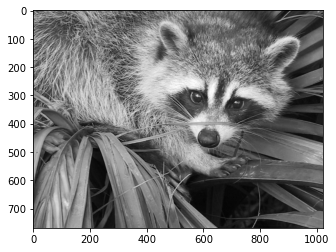

In [28]:
# Load the sample image
img = misc.face().mean(axis=2)
m, n = img.shape

# Display the original
plt.imshow(img, cmap='gray')

In [29]:
img.shape

(768, 1024)

The image is represented by a matrix with 768 rows and 1024 columns. This means that we are keeping 768x1025 unique elements.

Note: For simplicity's sake, we only considered a greyscale image instead of the colored image. 

In [30]:
# get svd decomposition using linalg.svd
U, s, Vh = linalg.svd(img)

In [31]:
U.shape

(768, 768)

In [32]:
s.shape

(768,)

In [33]:
Vh.shape

(1024, 1024)

The full svd decomposition of image produces three arrays: U (768x768), s (768x1), and Vh (1024x1024). Note that s is a 1-D array since we only keep the diagonal entries since the off-diagonal entries are all 0s.

Now, notice that the decomposition increased the number of elements to be stored from $768 \times 1024$, to ${(768x1024)}^2 + 768$. Don't panic, we will not keep all the rows and columns of these arrays. Instead, we will only keep a few of them. 

Using the theorem described above, if we want to get the best n rank approximation, we only need to keep $U_n \text{(768 x n elements)}, s_n \text{(n elements), and } Vh_n \text{(n x 1024) elements}.$ 
As an example, if we want the best rank 1 approximation, we only need to keep $768 + 1 + 1024$ elements!

We will show this below.

In [34]:
def compute_compression_rate(Un, sn, Vhn, A):
    """Compute the compression rate for the rank n SVD approximation of matrix A"""
    return (Un.size + sn.size + Vhn.size) / A.size

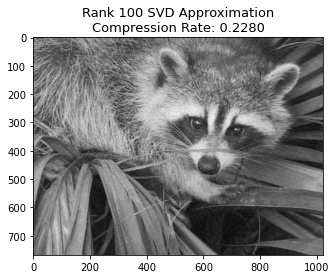

In [35]:
rank = 100
U_ = U[:, :rank]
s_ = s[:rank]
Vh_ = Vh[:rank, :]

img_recon = U_.dot(np.diag(s_)).dot(Vh_)
compression_rate = compute_compression_rate(U_, s_, Vh_, img)
plt.imshow(img_recon, cmap='gray')
plt.title(f'Rank {rank} SVD Approximation\nCompression Rate: \
{compression_rate:.4f}', size=13);

The image above shows that we can visually confirm that the information is retained even when we only used 22.80% of the original number of elements.

In [36]:
# wrap the method above into a function for reusability
def plot_reconstruction(rank, U, s, Vh, img):
    U_ = U[:, :rank]
    s_ = s[:rank]
    Vh_ = Vh[:rank, :]

    img_recon = U_.dot(np.diag(s_)).dot(Vh_)
    compression_rate = compute_compression_rate(U_, s_, Vh_, img)
    plt.imshow(img_recon, cmap='gray')
    plt.title(f'Rank {rank} SVD Approximation\nCompression Rate: \
    {compression_rate:.4f}', size=13);

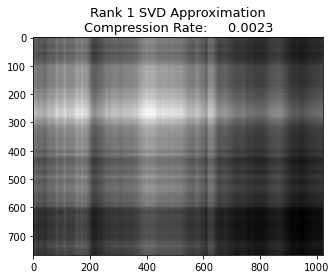

In [37]:
# rank 1 approximation
plot_reconstruction(1, U, s, Vh, img)

While the compression rate is really good, retaining only the best rank 1 approximation is not enough to retain the original information.

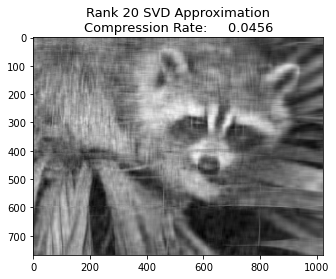

In [38]:
# rank 20 approximation
plot_reconstruction(20, U, s, Vh, img)

With rank 20, we can see the original image but we can notice lines showing up. I looks like a blurred version of the original image.

## End Notes
We have shown how we can perform matrix decompositions in Python and ended with a demo on how one of these methods are used in a practical application. Many of modern systems rely on methods similar/based to the ones we've shown here.